# Datashader Clifford attractor app

[Datashader](http://datashader.org) renders data into images. 
[Clifford attractors](https://anaconda.org/jbednar/clifford_attractor/notebook) are a type of iterative equation that traces the path of a particle through a 2D space using functions of sine and cosine terms that make interesting "attractor" patterns (covering only some portions of the possible space, in certain shapes). Here we use Numpy and Pandas to calculate a dataframe consisting of ten million such locations, using Numba to make it 50X faster than bare Python. You can run this code yourself if you make a [conda](http://conda.pydata.org/miniconda.html) environment and run `conda install -c pyviz pyviz` first.

In [ ]:
import numpy as np, pandas as pd
from numba import jit

@jit
def clifford_trajectory(a, b, c, d, x0, y0, n):
    xs, ys = np.zeros(n), np.zeros(n)
    xs[0], ys[0] = x0, y0
    for i in np.arange(n-1):
        xs[i+1] = np.sin(a * ys[i]) + c * np.cos(a * xs[i])
        ys[i+1] = np.sin(b * xs[i]) + d * np.cos(b * ys[i])
    return pd.DataFrame(dict(x=xs,y=ys))

We can visualize the resulting dataframe using Datashader, with colormaps from [Colorcet](http://colorcet.pyviz.org):

In [ ]:
import datashader as ds
from datashader import transfer_functions as tf
from colorcet import kbc

def clifford_plot(a, b, c, d, n=5000000, cmap=kbc[::-1]):
    cvs = ds.Canvas(plot_width=600, plot_height=600)
    agg = cvs.points(clifford_trajectory(a, b, c, d, 0, 0, n), 'x', 'y')
    return tf.shade(agg, cmap=cmap)

In [ ]:
#clifford_plot(1.7, 1.7, 0.6, 1.2)

We could call this function a single time with one set of parameters, as e.g. `clifford_plot(1.7, 1.7, 0.6, 1.2)`, but instead let's use [Panel](http://panel.pyviz.org) to make a simple dashboard that lets us try out all of them interactively. First we declare what parameters there are that we will want to vary, and what code to run when they do:

In [ ]:
import param

class Clifford(param.Parameterized):
    a = param.Number(1.7, bounds=(-2, 2))
    b = param.Number(1.7, bounds=(-2, 2))
    c = param.Number(0.6, bounds=(-2, 2))
    d = param.Number(1.2, bounds=(-2, 2))

    def view(self):
        return clifford_plot(self.a, self.b, self.c, self.d)
    
c = Clifford(name="Clifford Attractor")

And now we can make a panel with a logo, widgets for the parameters, and the result of calling the `view` method whenever any of the parameters change:

In [ ]:
import panel as pp
pp.extension()

logo  = "https://tinyurl.com/y9c2zn65/logo_stacked_s.png"
panel = pp.Row(pp.Column(logo, c), c.view)
panel

In [ ]:
#c.d=-1.3

If you run the above cells in a Jupyter notebook, you should get an app with sliders, etc. to try out any value you like for a, b, c, or d. Or you can control it from python, by running something like `c.d=-1.3` in any cell. Note that many of the possible parameter combinations produce uninteresting plots, so you may have to hunt around to find something that is not just a single value or a small scattering of points.

In the notebook context, the following line doesn't achieve anything (it creates a separate copy of the above panel of widgets and the plot), but if you have a line like this in your notebook, you can serve this app as a standalone dashboard using `bokeh serve --show DatashaderClifford.ipynb`.

In [ ]:
panel.server_doc();

Once you run `bokeh serve`, you should get something like the following in your browser:

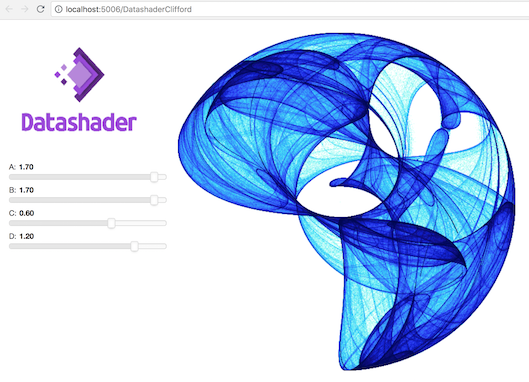